In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df["Ereturn_1d"] = df["return_1d"].apply(lambda x: 0 if x < 0 else 1)
df["Ereturn_3d"] = df["return_3d"].apply(lambda x: 0 if x < 0 else 1)
df["Ereturn_7d"] = df["return_7d"].apply(lambda x: 0 if x < 0 else 1)

In [4]:
df.head()

,date,price,volume,return_1d,return_3d,return_7d,MA7,MA30,MA_diff,vol_7d,vol_MA7,highest_30,lowest_30,pos_channel_30,Ereturn_1d,Ereturn_3d,Ereturn_7d
0,2024-12-18,101033.246537,8.901131e+10,0.175001,4.674162,10.091586,98036.089527,93175.938964,4860.150563,1.993259,8.624032e+10,101033.246537,85439.426459,1.000000,1,1,1
1,2024-12-19,96953.120694,1.098374e+11,-4.038399,-2.688094,0.723249,98135.543502,93559.728772,4575.814730,2.231111,8.581956e+10,101033.246537,86966.370738,0.709948,0,0,1
2,2024-12-20,94409.725956,9.707285e+10,-2.623324,-6.392255,-1.119358,97982.865523,93807.840613,4175.024911,2.452088,8.603488e+10,101033.246537,87635.212798,0.505635,0,0,0
3,2024-12-21,93650.428136,1.076939e+11,-0.804258,-7.307316,-2.927020,97579.462650,93951.974714,3627.487936,2.403137,9.070398e+10,101033.246537,87635.212798,0.448963,0,0,0
4,2024-12-22,93195.444104,5.087094e+10,-0.485832,-3.875767,-3.446090,97104.287874,93922.852331,3181.435543,2.395018,9.017384e+10,101033.246537,87635.212798,0.415004,0,0,0


In [5]:
df.isnull().sum()

date              0
price             0
volume            0
return_1d         0
return_3d         0
return_7d         0
MA7               0
MA30              0
MA_diff           0
vol_7d            0
vol_MA7           0
highest_30        0
lowest_30         0
pos_channel_30    0
Ereturn_1d        0
Ereturn_3d        0
Ereturn_7d        0
dtype: int64

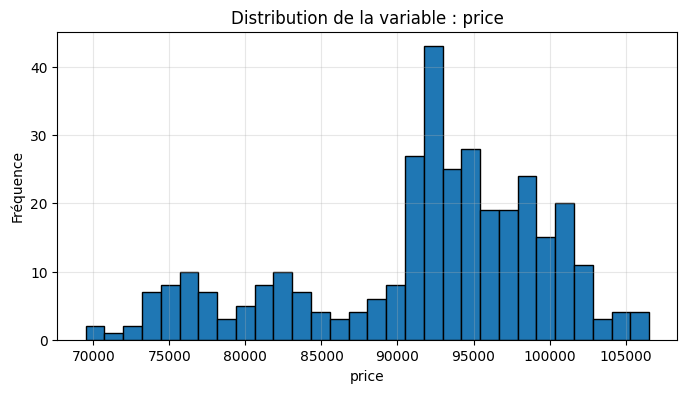

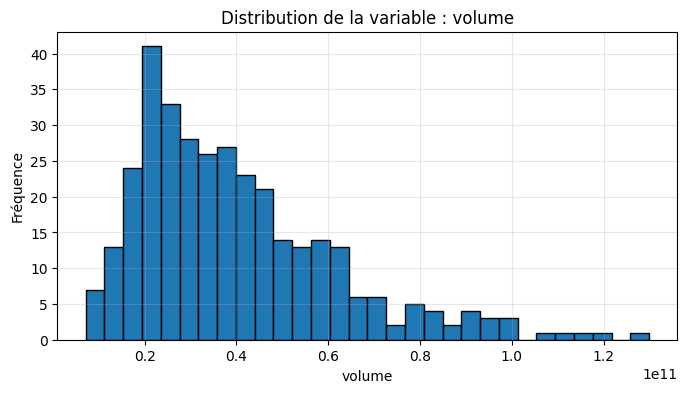

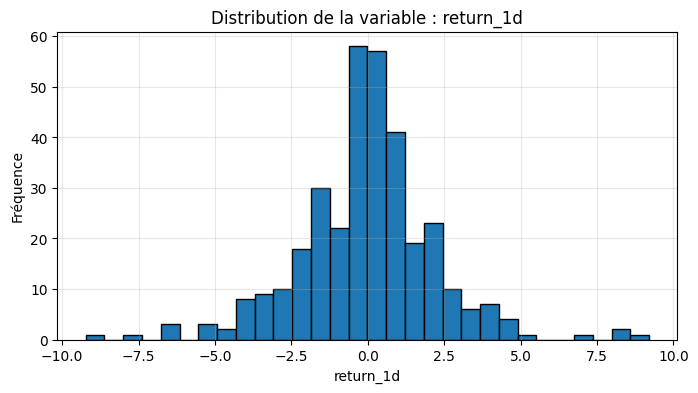

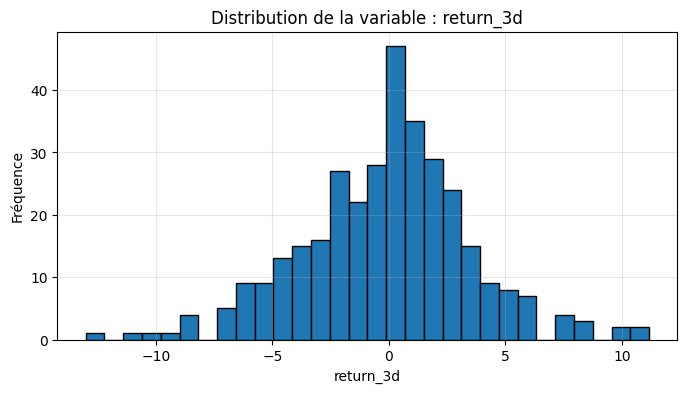

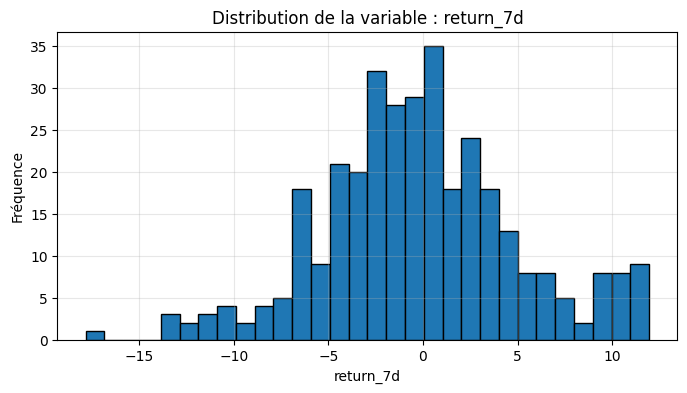

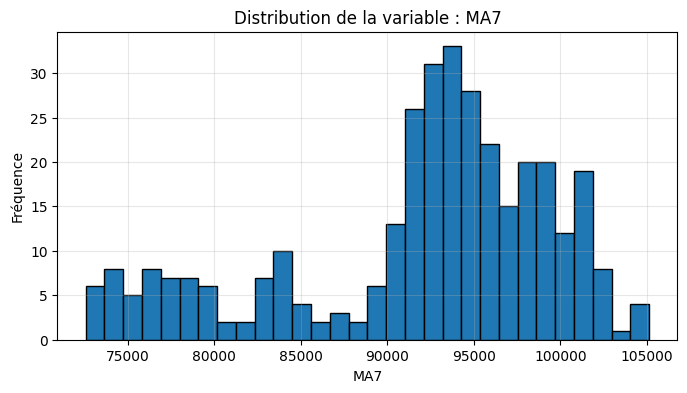

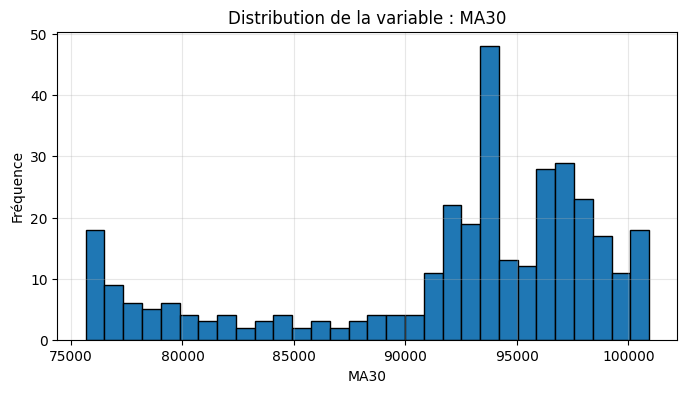

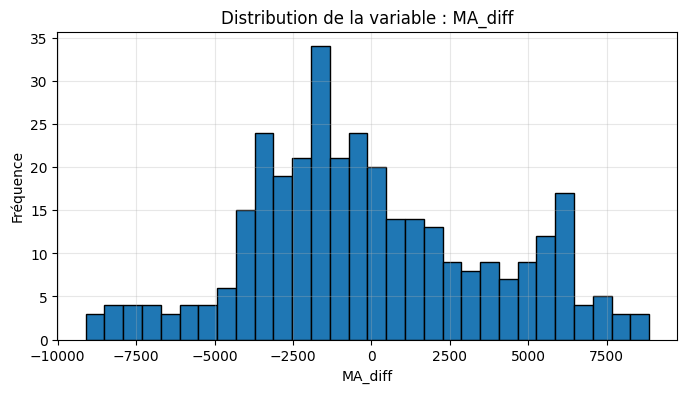

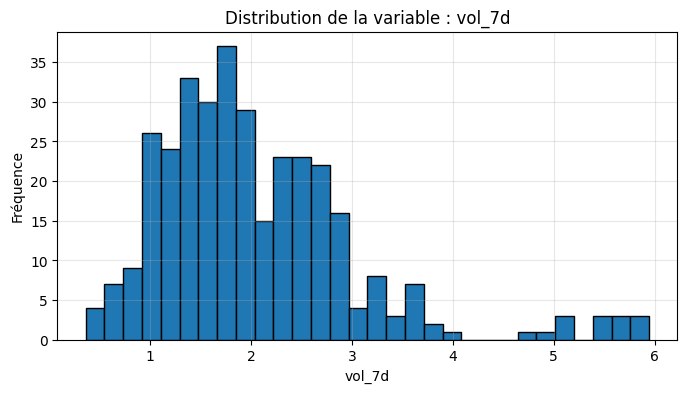

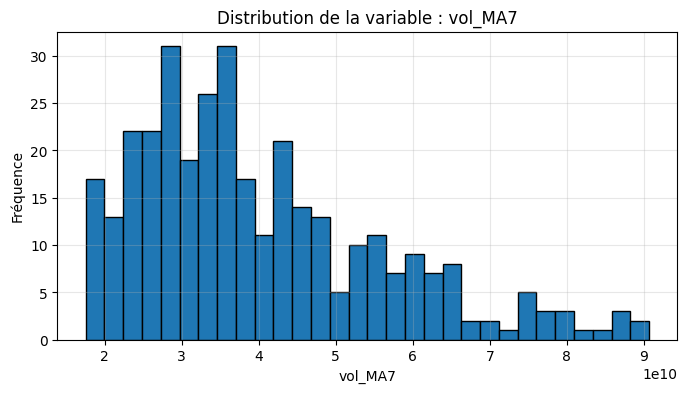

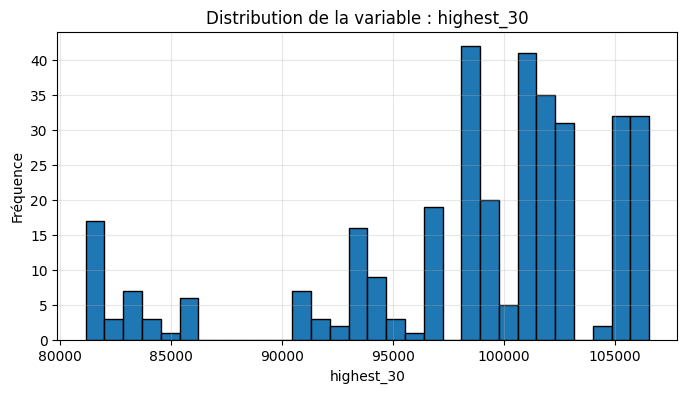

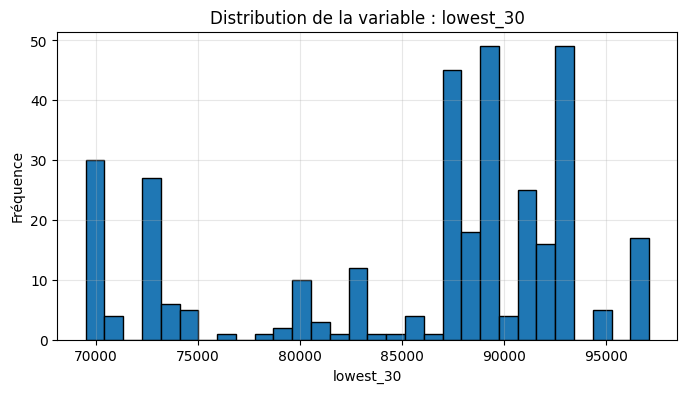

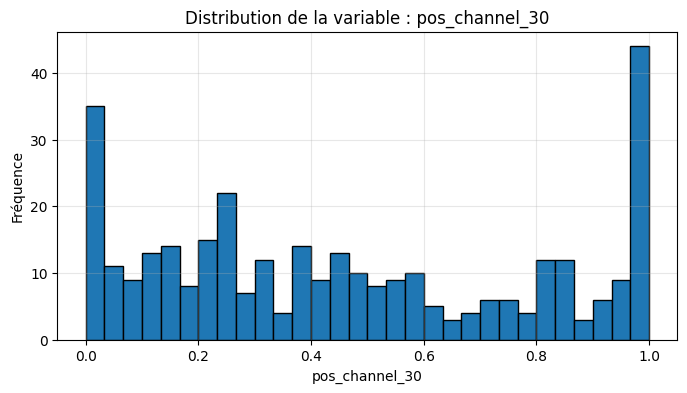

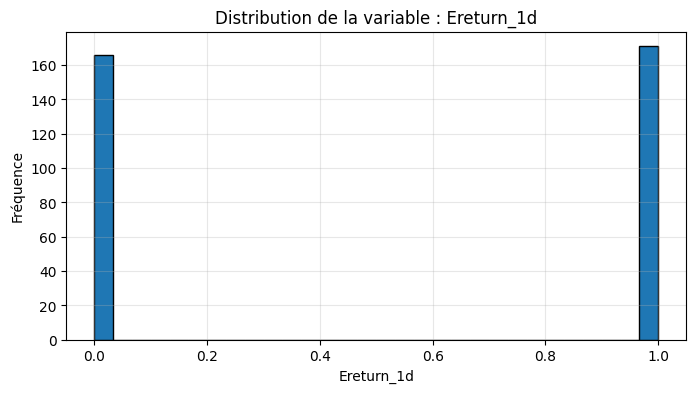

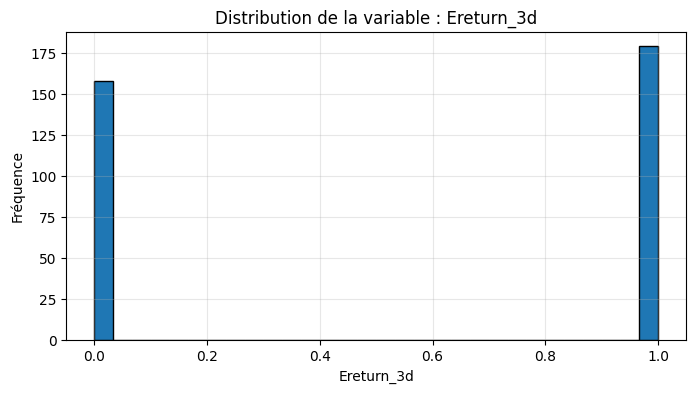

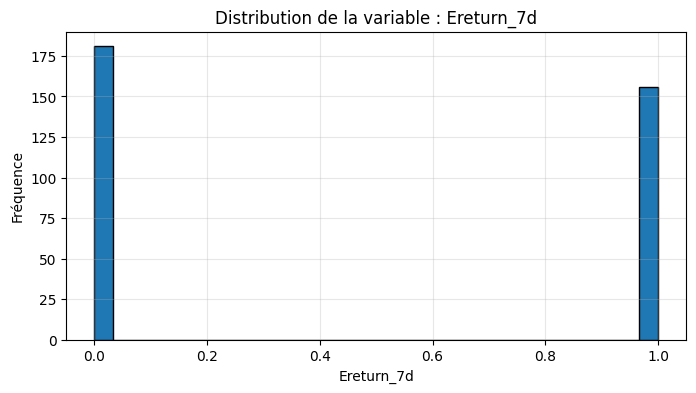

In [6]:
# Colonnes numériques uniquement (on enlève les dates)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Boucle sur chaque variable
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"Distribution de la variable : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True, alpha=0.3)
    plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

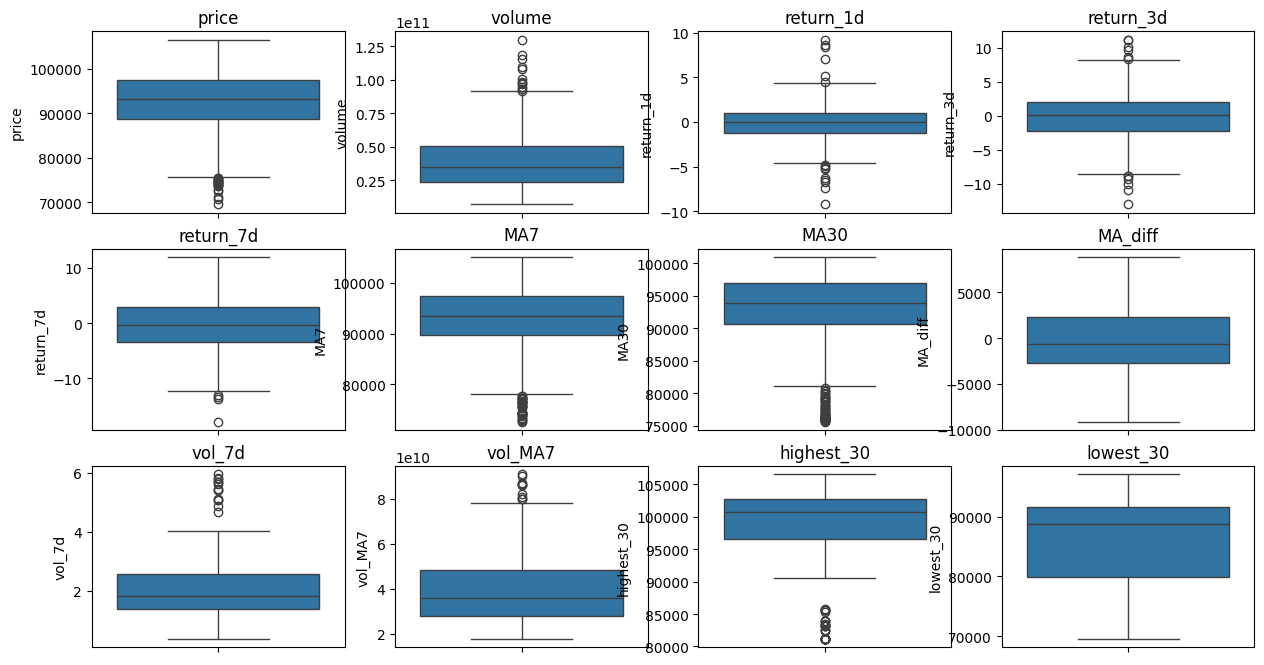

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)     # ajuster selon le nombre de variables
    sns.boxplot(data=df, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [16]:
df["Ereturn_1d"].value_counts()

Ereturn_1d
1    171
0    166
Name: count, dtype: int64

In [18]:
df["Ereturn_3d"].value_counts()

Ereturn_3d
1    179
0    158
Name: count, dtype: int64

In [20]:
df["Ereturn_7d"].value_counts()

Ereturn_7d
0    181
1    156
Name: count, dtype: int64

In [14]:


# Liste des variables
features = [
    "price", "volume", "Ereturn_1d", "Ereturn_3d", "Ereturn_7d", 
    "MA7", "MA30", "MA_diff", "vol_7d", "vol_MA7",
    "highest_30", "lowest_30", "pos_channel_30"
]

# Fonction pour générer les stats
def descriptive_table(df, variables):
    desc = df[variables].describe().T  # count, mean, std, min, 25%, 50%, 75%, max
    
    # Ajouter skewness et kurtosis
    desc["skewness"] = df[variables].skew()
    desc["kurtosis"] = df[variables].kurtosis()
    
    return desc

# Générer le tableau
tableau = descriptive_table(df, features)

# Afficher
print(tableau)

                count          mean           std           min           25%  \
price           337.0  9.174769e+04  8.160045e+03  6.949145e+04  8.876824e+04   
volume          337.0  3.999125e+10  2.187394e+10  7.146203e+09  2.343669e+10   
Ereturn_1d      337.0  5.074184e-01  5.006884e-01  0.000000e+00  0.000000e+00   
Ereturn_3d      337.0  5.311573e-01  4.997703e-01  0.000000e+00  0.000000e+00   
Ereturn_7d      337.0  4.629080e-01  4.993637e-01  0.000000e+00  0.000000e+00   
MA7             337.0  9.190827e+04  7.856677e+03  7.256249e+04  8.965238e+04   
MA30            337.0  9.203105e+04  7.177416e+03  7.565390e+04  9.061489e+04   
MA_diff         337.0 -1.227775e+02  3.824551e+03 -9.112399e+03 -2.753868e+03   
vol_7d          337.0  2.052101e+00  1.011751e+00  3.580506e-01  1.384027e+00   
vol_MA7         337.0  4.002948e+10  1.594530e+10  1.751736e+10  2.781334e+10   
highest_30      337.0  9.864905e+04  6.827084e+03  8.113561e+04  9.651295e+04   
lowest_30       337.0  8.570

## 


        Analyse pour return_1d



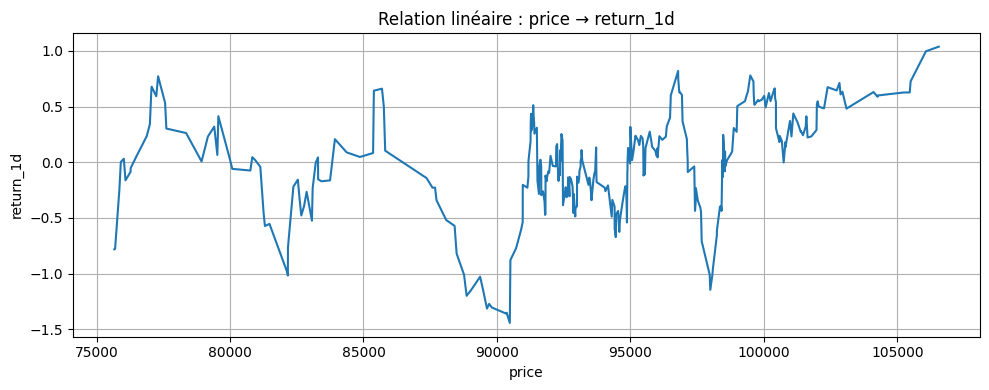

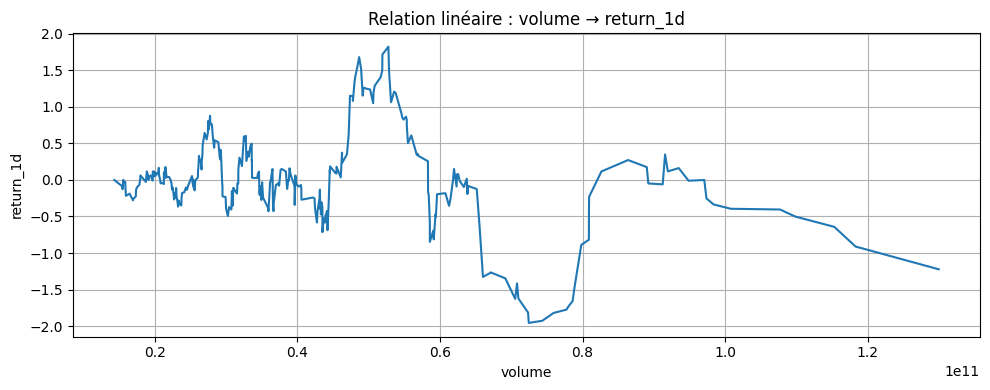

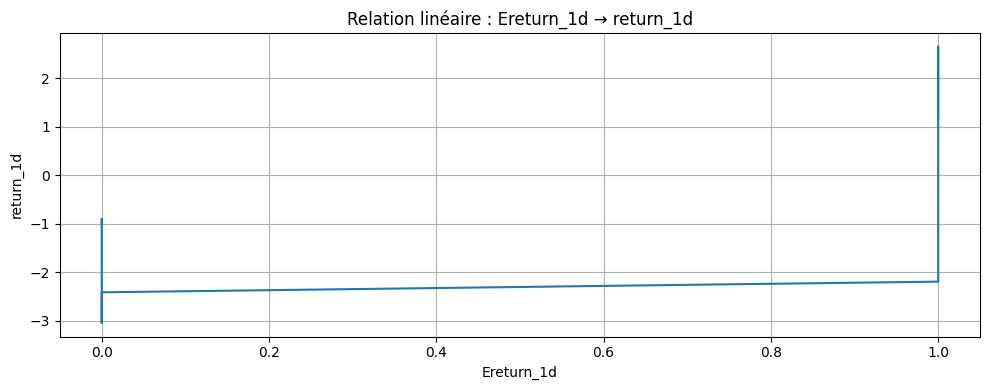

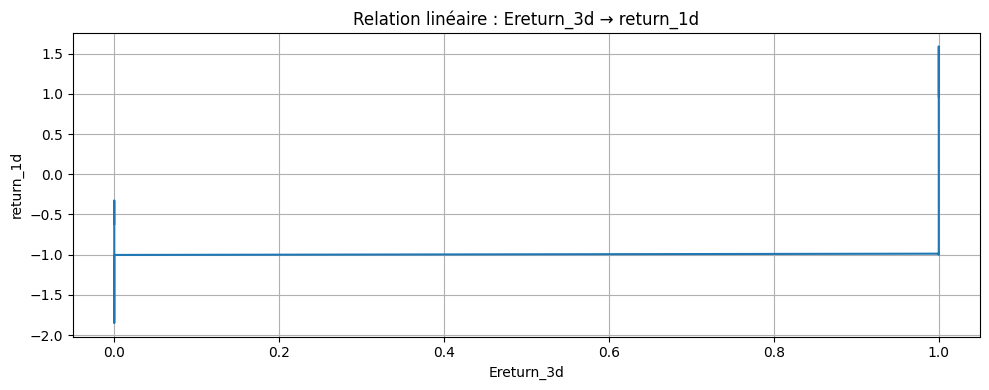

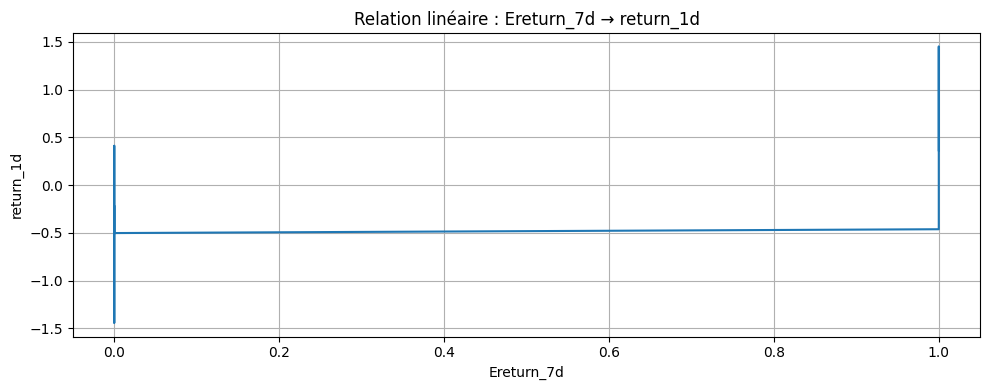

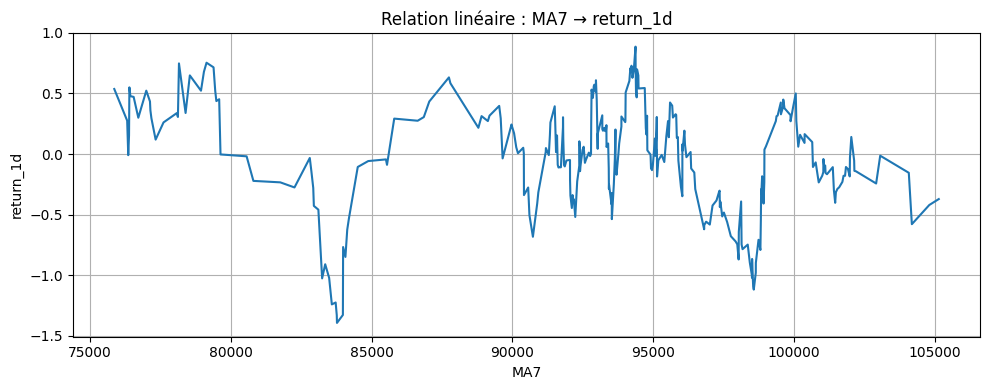

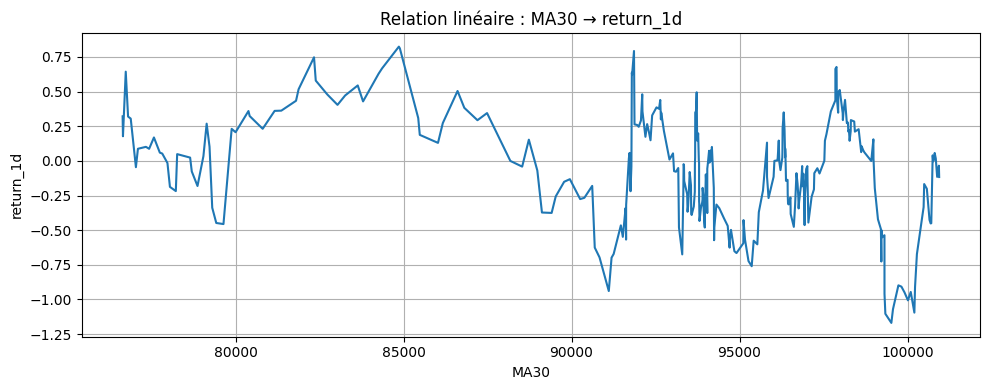

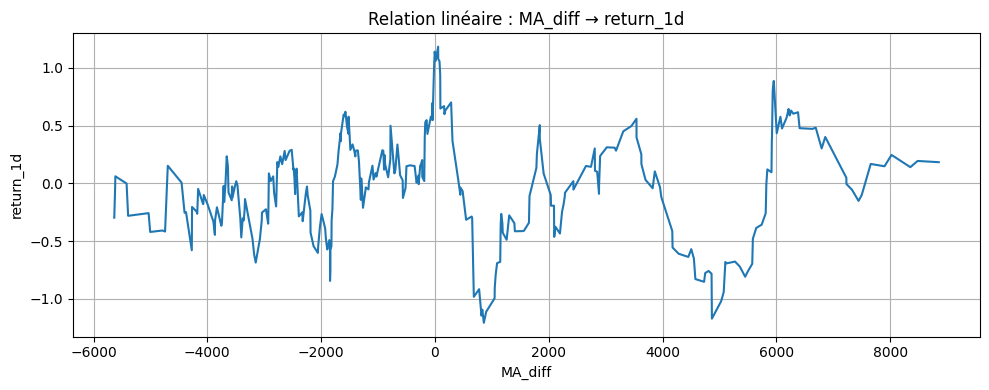

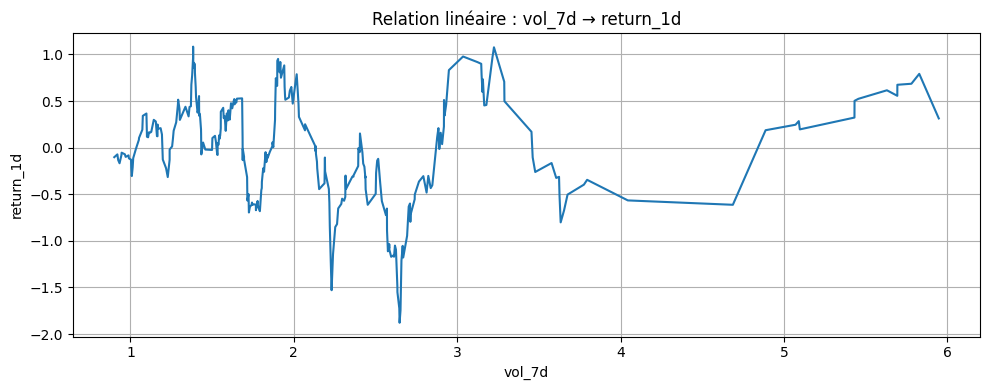

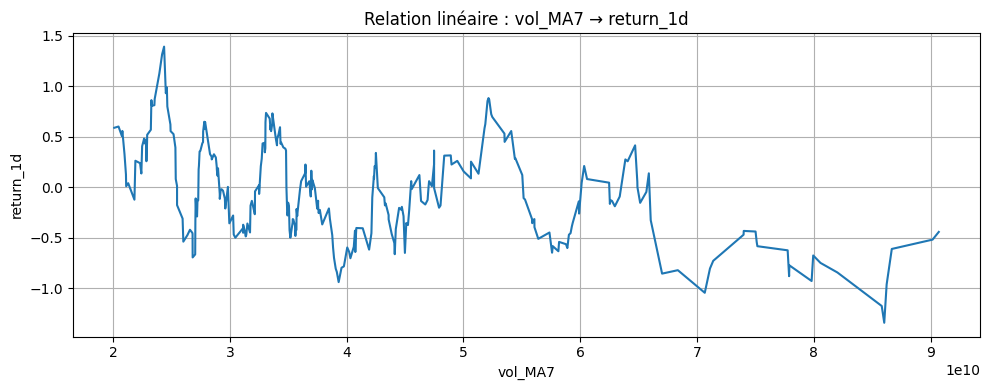

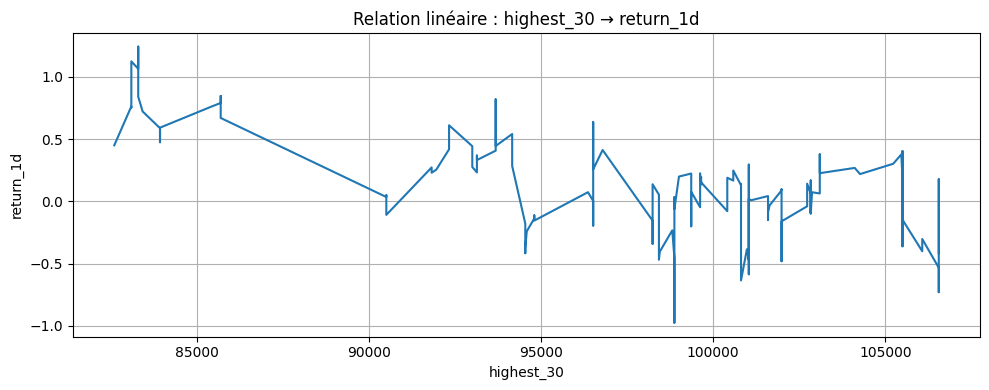

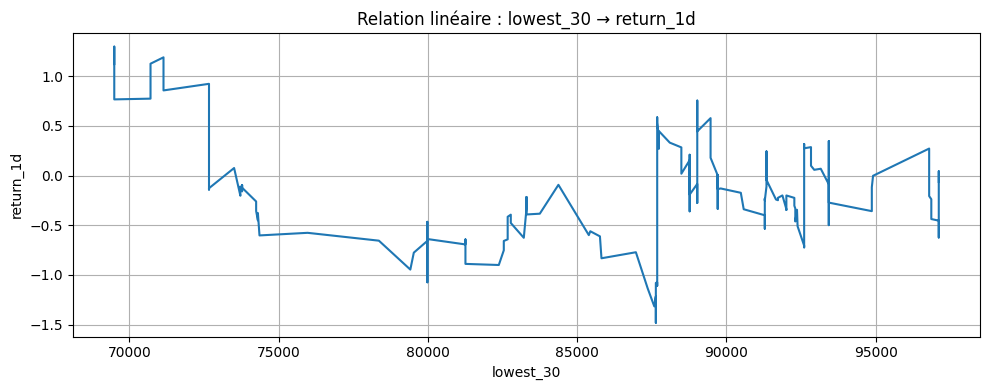

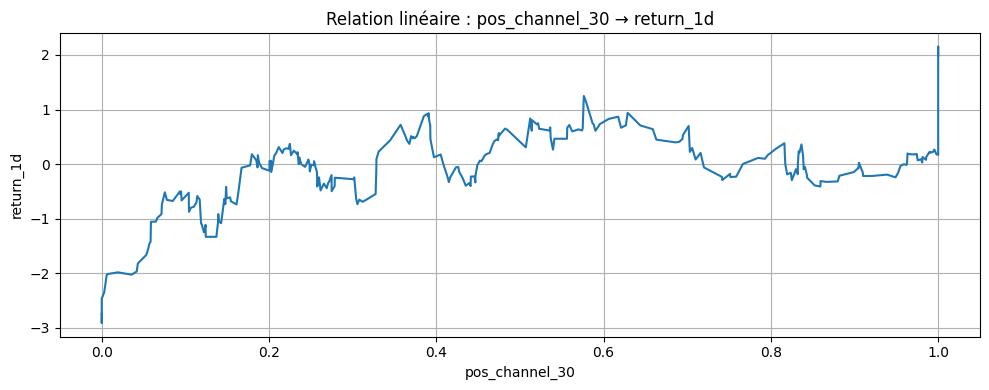


        Analyse pour return_3d



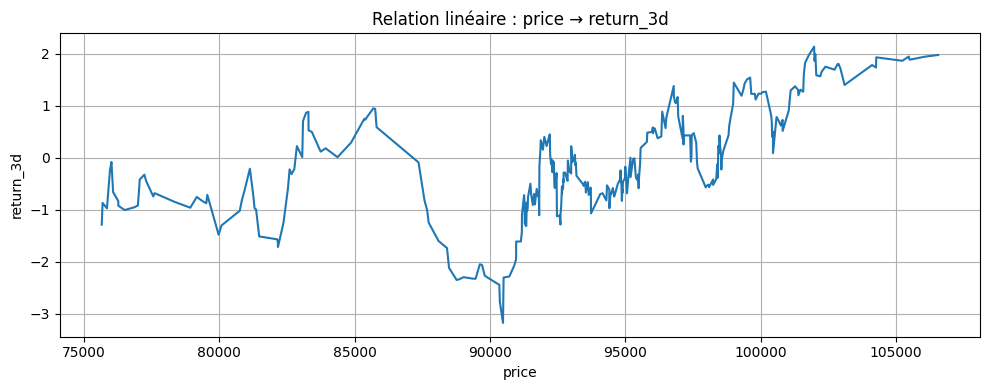

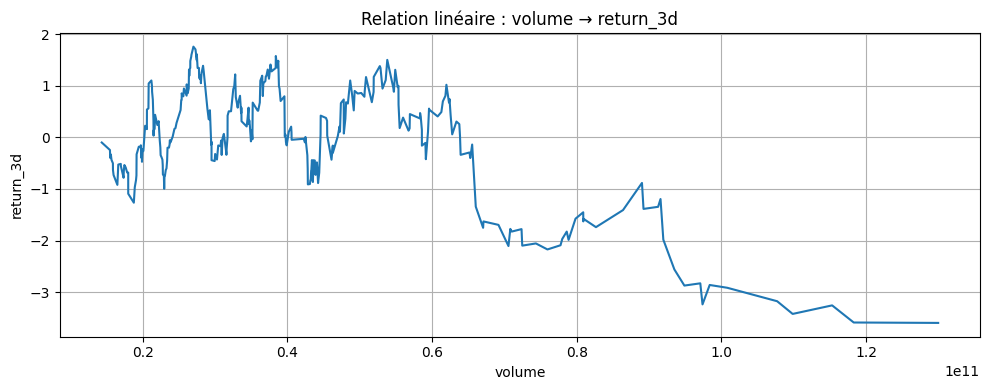

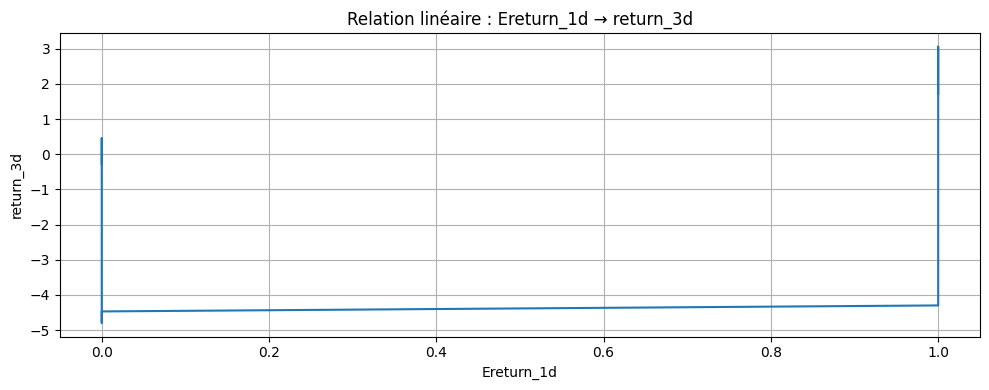

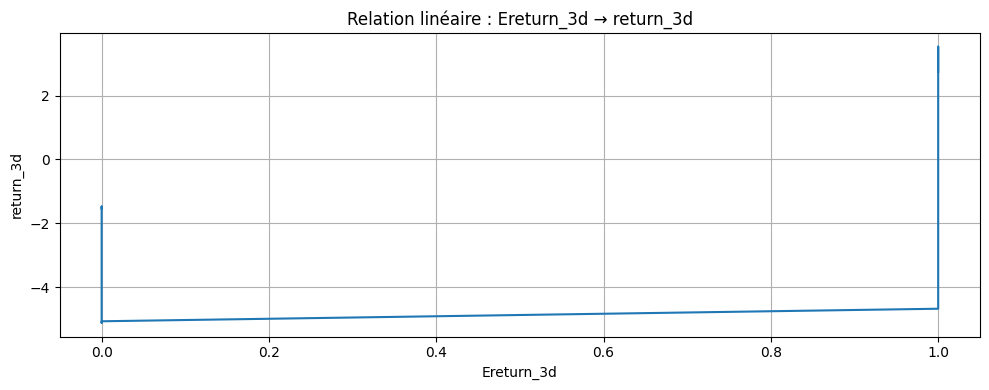

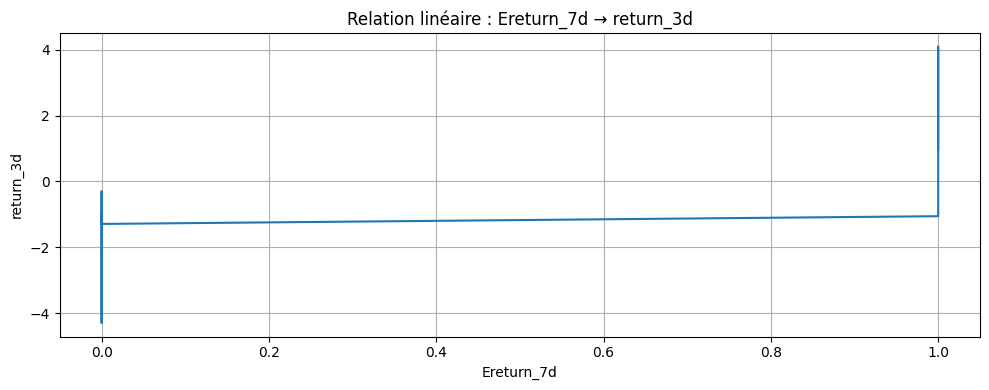

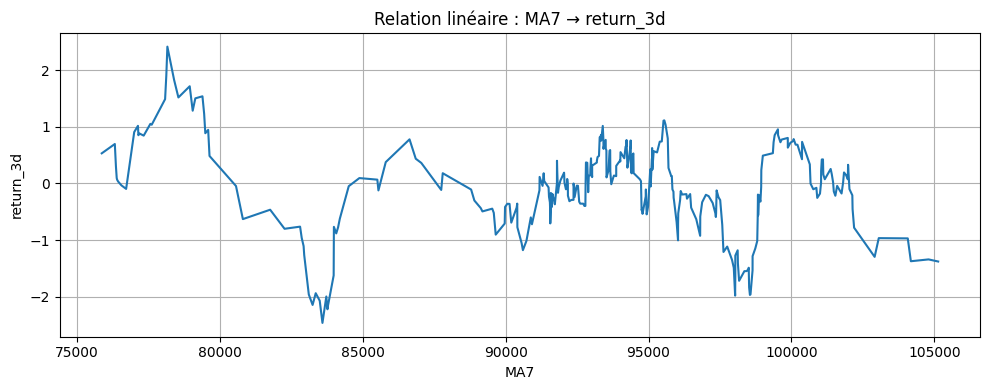

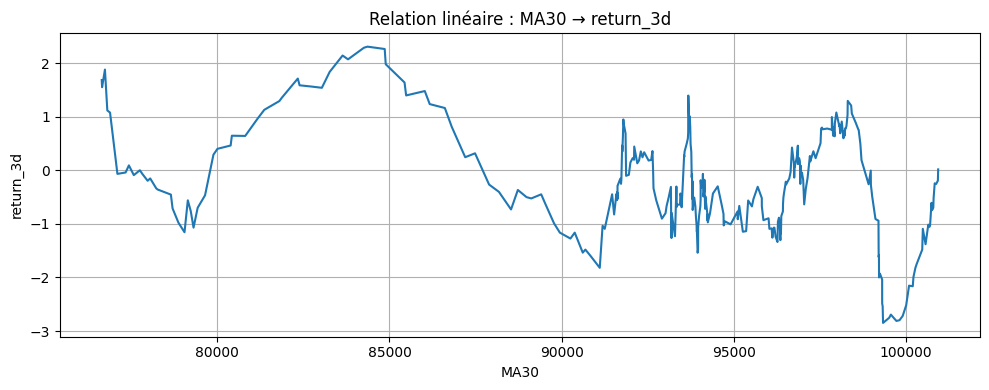

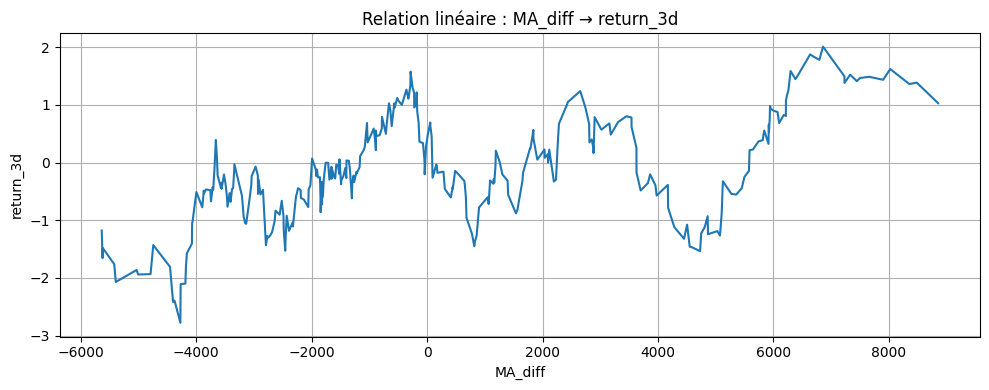

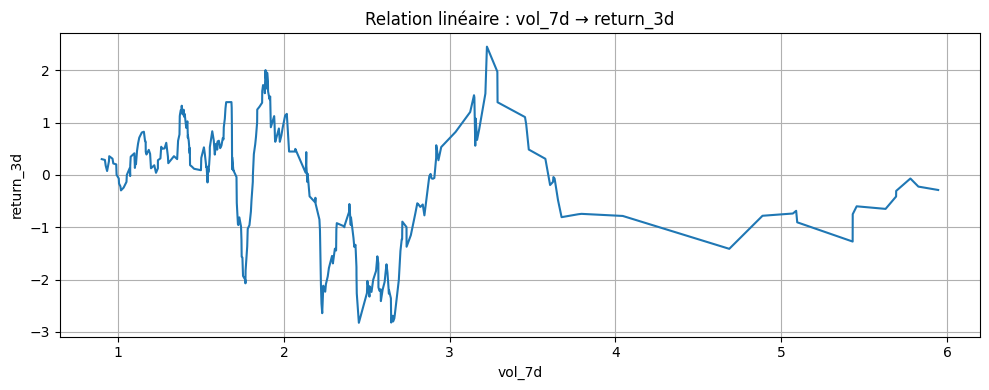

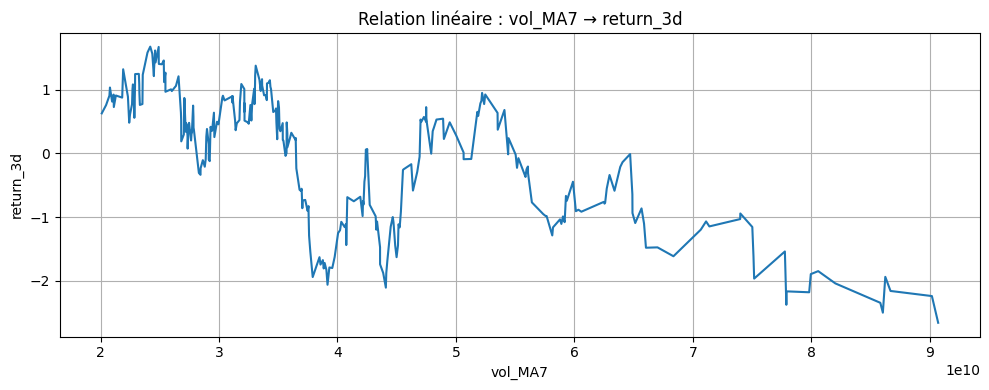

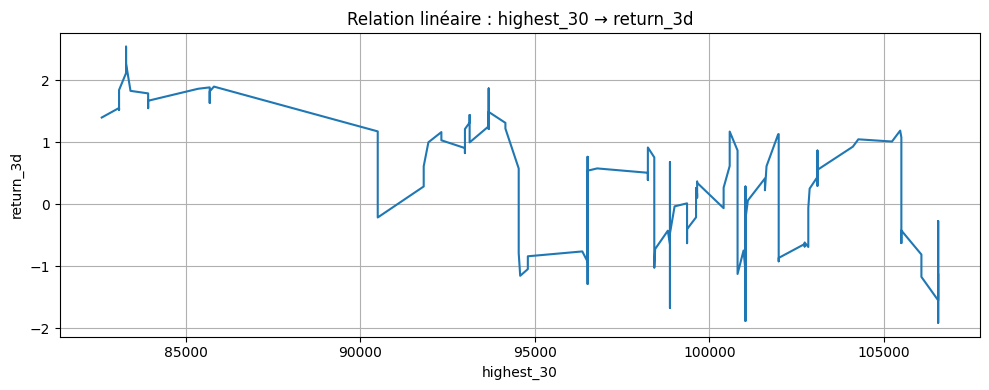

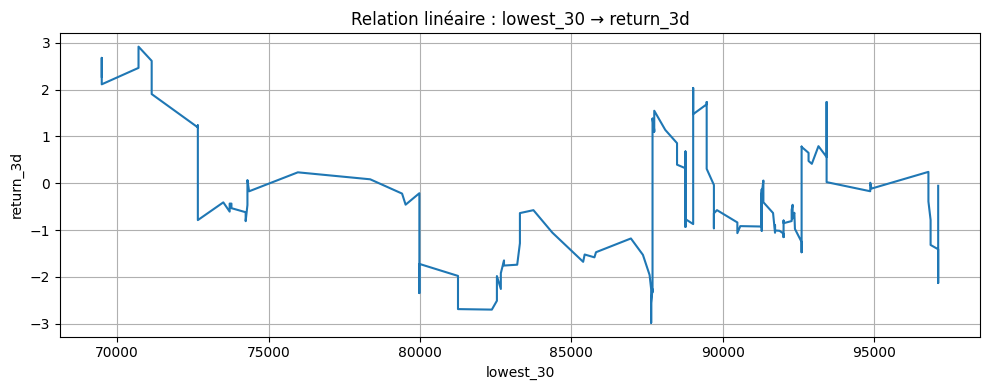

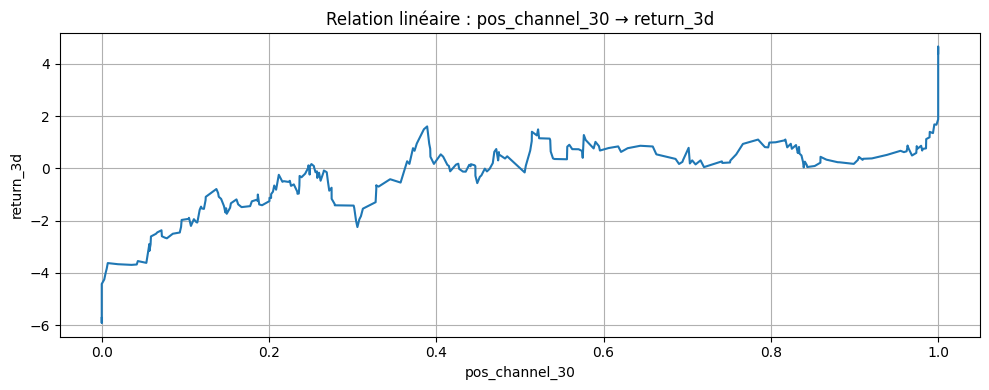


        Analyse pour return_7d



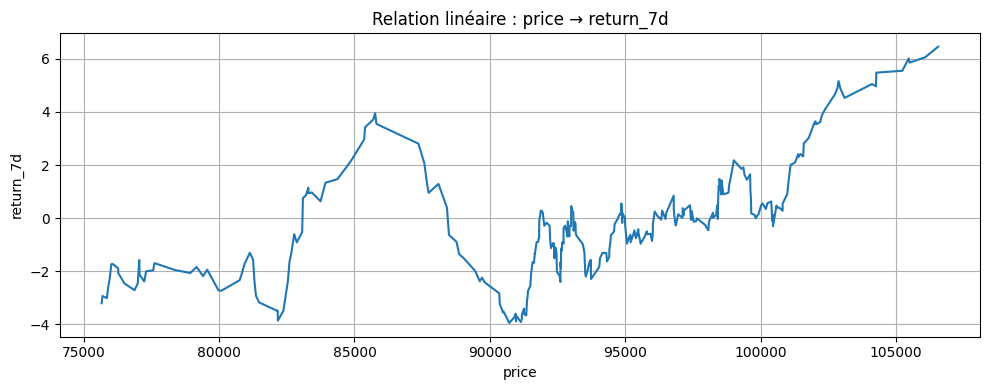

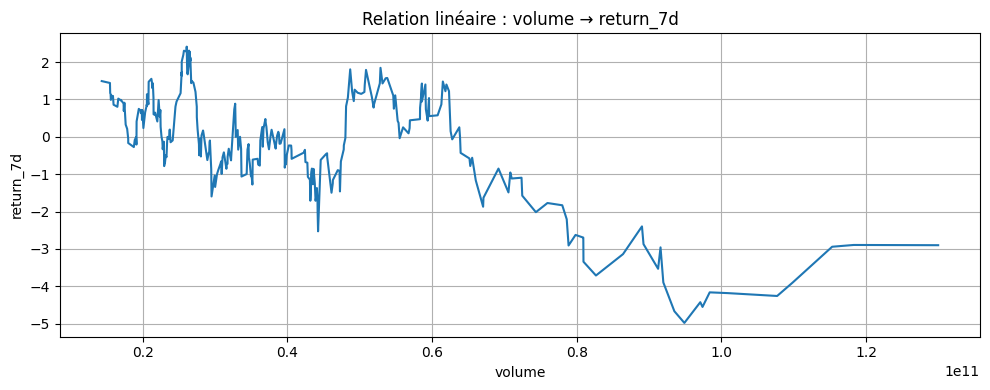

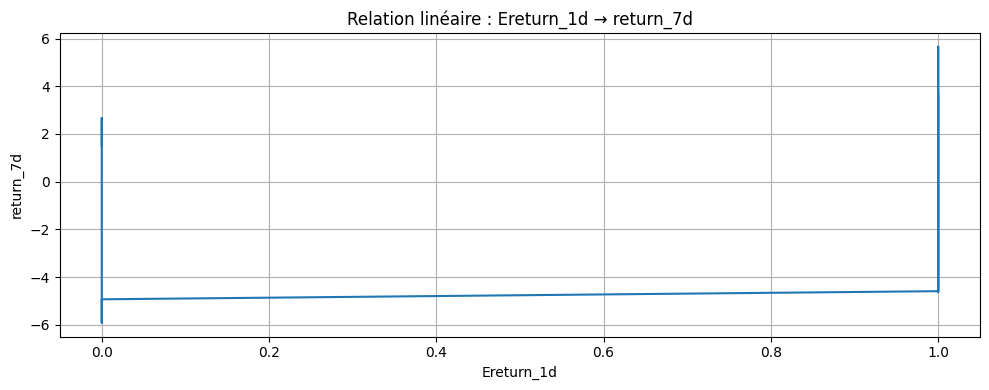

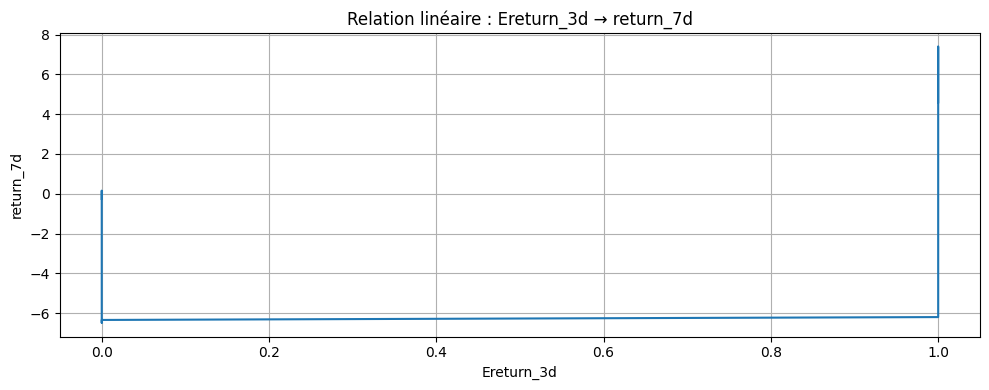

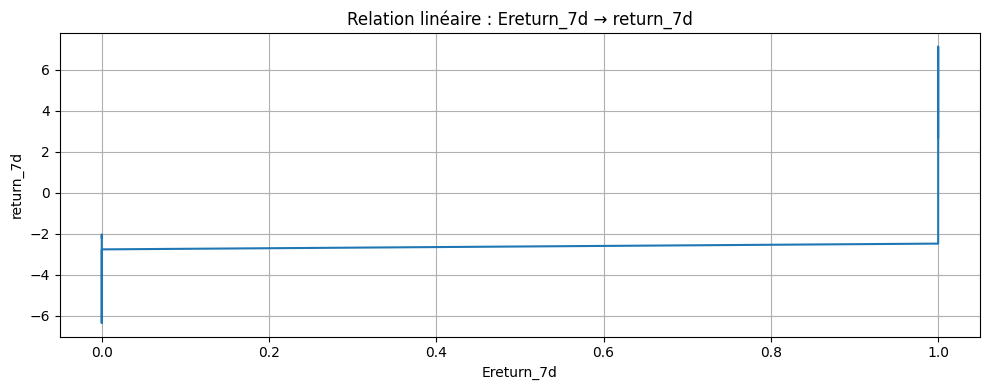

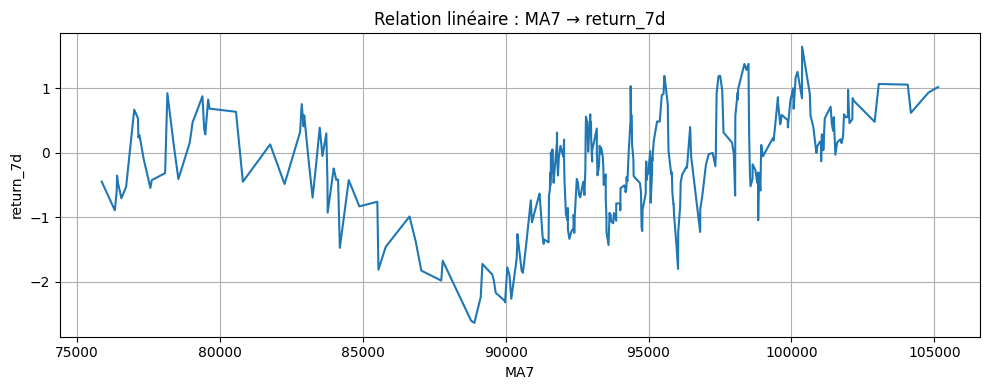

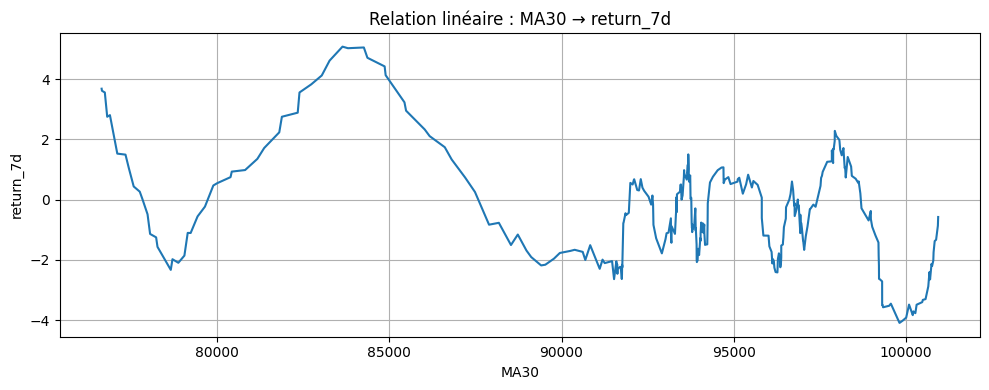

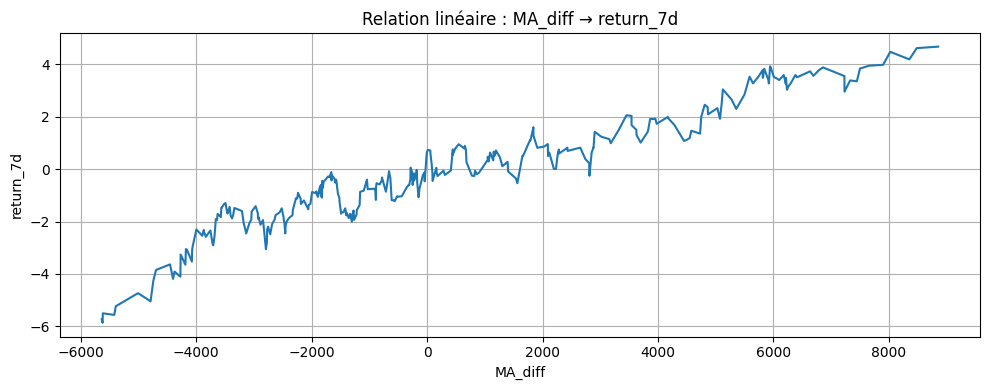

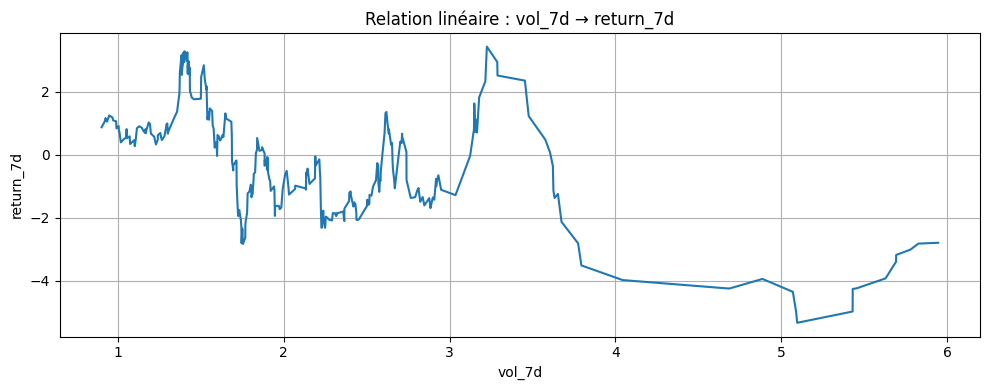

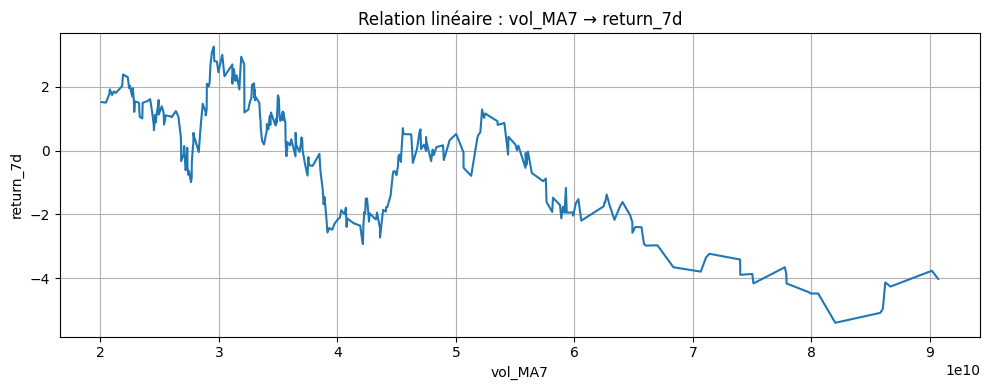

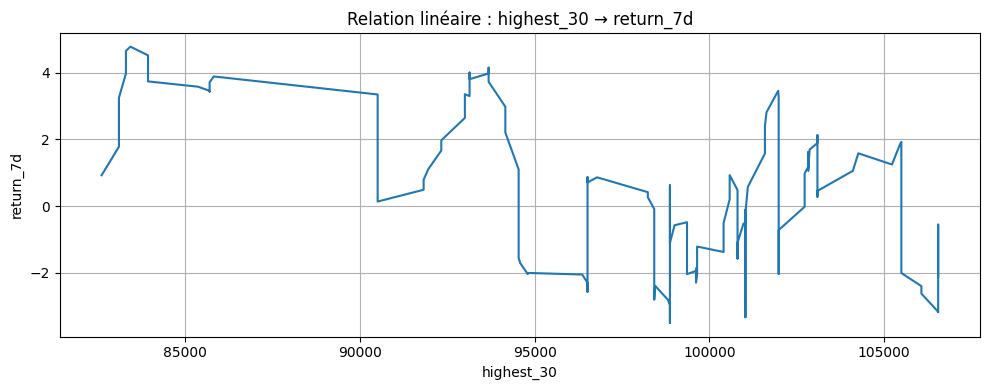

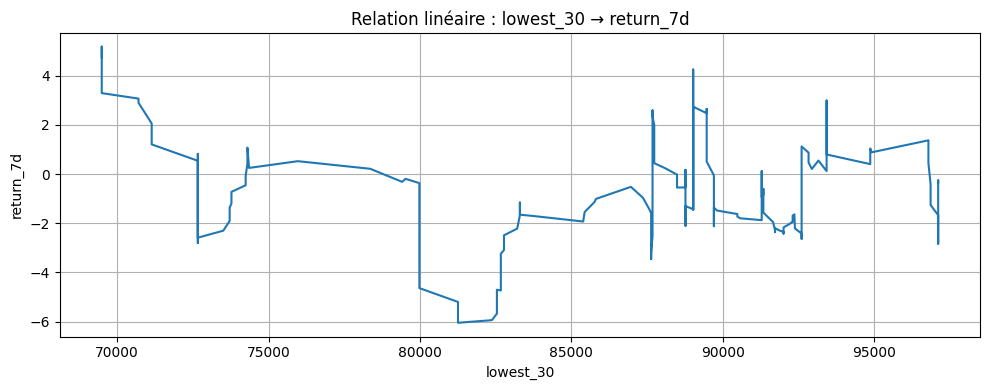

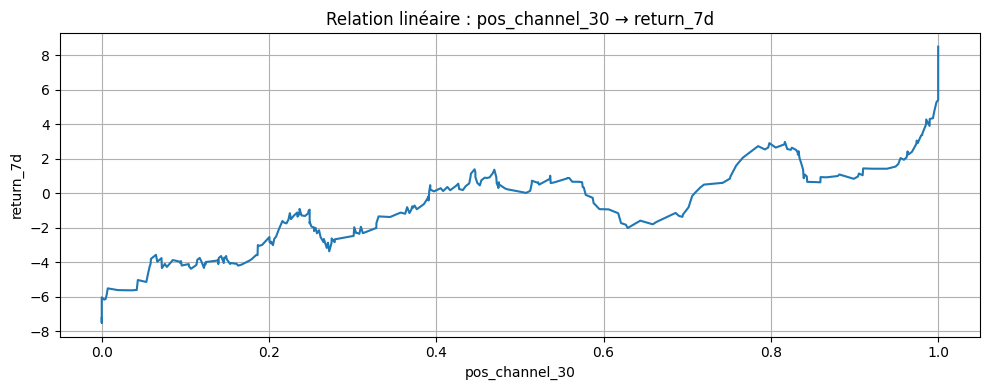

In [10]:
# --- Liste de tes variables ---

features = [
    "price", "volume", "Ereturn_1d", "Ereturn_3d", "Ereturn_7d", 
    "MA7", "MA30", "MA_diff", "vol_7d", "vol_MA7",
    "highest_30", "lowest_30", "pos_channel_30"
]

# --- Liste des cibles binaires ---
targets = ["return_1d", "return_3d", "return_7d"]

# --- Fonction d'affichage d'un graphique binaire ---
def plot_linear_relation(df, feature, target):
    # On trie par la variable explicative
    temp = df[[feature, target]].dropna().sort_values(by=feature)

    # On lisse la cible (rolling mean)
    y_smooth = temp[target].rolling(20).mean()

    plt.figure(figsize=(10,4))
    plt.plot(temp[feature].values, y_smooth, label=f"{target} (lissé)")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"Relation linéaire : {feature} → {target}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Boucle complète ---
for target in targets:
    print("\n======================================")
    print(f"        Analyse pour {target}")
    print("======================================\n")
    
    for feature in features:
        plot_linear_relation(df, feature, target)